In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Instruction

This assignment uses data from the UC Irvine Machine Learning Repository, a popular repository for machine learning datasets. In particular, we will be using the “Individual household electric power consumption Data Set” which I have made available on the course web site:

* Dataset: Electric power consumption[20Mb]
<https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip>
* Description: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.
The following descriptions of the 9 variables in the dataset are taken from the UCI web site:

1. Date: Date in format dd/mm/yyyy
2. Time: time in format hh:mm:ss
3. Global_active_power: household global minute-averaged active power (in kilowatt)
4. Global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. Voltage: minute-averaged voltage (in volt)
6. Global_intensity: household global minute-averaged current intensity (in ampere)
7. Sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. Sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. Sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


The dataset has 2,075,259 rows and 9 columns. First calculate a rough estimate of how much memory the dataset will require in memory before reading. Make sure your computer has enough memory (most modern computers should be fine).
We will only be using data from the dates 2007-02-01 and 2007-02-02. One alternative is to read the data from just those dates rather than reading in the entire dataset and subsetting to those dates.

Note that in this dataset missing values are coded as ?.


## Making Plots

Our overall goal here is simply to examine how household energy usage varies over a 2-day period in February, 2007. 

First you will need to fork and clone the following GitHub repository: https://github.com/rdpeng/ExData_Plotting1

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import urllib.request

In [3]:
url = 'https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip'
urllib.request.urlretrieve(url, 'household.zip')

zf = zipfile.ZipFile('household.zip')
for name in zf.namelist():
    print(name)

('household.zip', <http.client.HTTPMessage at 0x1f6ad5d5f28>)

household_power_consumption.txt


In [4]:
df = pd.read_table(zf.open('household_power_consumption.txt'), sep=';', na_values='?')
df.shape
df.head()

(2075259, 9)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [6]:
df.columns[2:8]

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2'],
      dtype='object')

In [7]:
type(df.Date)

pandas.core.series.Series

In [8]:
df.index

RangeIndex(start=0, stop=2075259, step=1)

In [9]:
import re
rowname = [col for col in df.Date if re.findall(r'^[1,2]/2/2007',col)]
rowname[:10]
len(rowname)
type(rowname)

['1/2/2007',
 '1/2/2007',
 '1/2/2007',
 '1/2/2007',
 '1/2/2007',
 '1/2/2007',
 '1/2/2007',
 '1/2/2007',
 '1/2/2007',
 '1/2/2007']

2880

list

In [10]:
df1 = df.loc[(df.Date == '1/2/2007')|(df.Date=='2/2/2007')] # select rows by index
df1.shape
df1.head()

(2880, 9)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
66636,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
66637,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
66638,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
66639,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
66640,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0


In [11]:
df1['Sub_metering_1'].unique()

array([  0.,   2.,   1.,  27.,  38.,  37.,  17.,  19.])

## Making Plots

### Using Pandas Plot

df.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot
* ‘scatter’ : scatter plot
* ‘hexbin’ : hexbin plot

In [12]:
df2 = df1.copy()
df2.shape
df2.head()

(2880, 9)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
66636,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
66637,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
66638,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
66639,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
66640,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0


In [13]:
df2['newdatetime'] = [df2.Date.iloc[i]+' '+df2.Time.iloc[i] for i in np.arange(len(df2))]
df2.newdatetime.head()

66636    1/2/2007 00:00:00
66637    1/2/2007 00:01:00
66638    1/2/2007 00:02:00
66639    1/2/2007 00:03:00
66640    1/2/2007 00:04:00
Name: newdatetime, dtype: object

In [14]:
df2.newdatetime = pd.to_datetime(df2.newdatetime,format='%d/%m/%Y %H:%M:%S')
df2['day_of_week'] = df2.newdatetime.dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df2['day_of_week'] = df2['day_of_week'].apply(lambda x: days[x])
df2.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,newdatetime,day_of_week
66636,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0,2007-02-01 00:00:00,Thurs
66637,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0,2007-02-01 00:01:00,Thurs
66638,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0,2007-02-01 00:02:00,Thurs
66639,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0,2007-02-01 00:03:00,Thurs
66640,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0,2007-02-01 00:04:00,Thurs


In [15]:
df2.day_of_week.unique()

array(['Thurs', 'Fri'], dtype=object)

In [16]:
type(df2.newdatetime)
df2.dtypes

pandas.core.series.Series

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
newdatetime              datetime64[ns]
day_of_week                      object
dtype: object

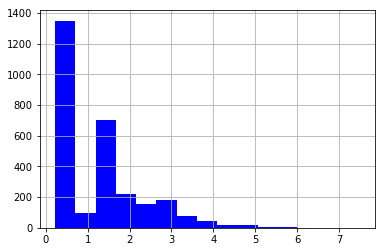

In [17]:
df2['Global_active_power'].hist(bins=15, color='blue')
plt.show()

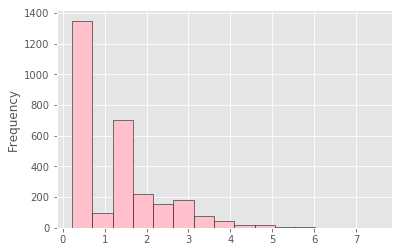

In [34]:
df2['Global_active_power'].plot.hist(bins=15, color='pink', ec='black')
plt.savefig('plot1.png')
plt.show()

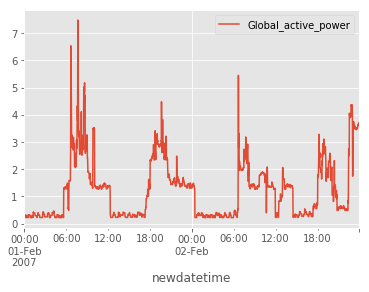

In [35]:
df2.plot(x='newdatetime',y='Global_active_power')
# plt.xticks([])
plt.savefig('plot2.png')
plt.show()

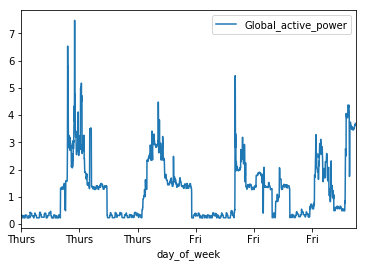

In [20]:
df2.plot(x='day_of_week',y='Global_active_power')
# plt.xticks([])
plt.show()

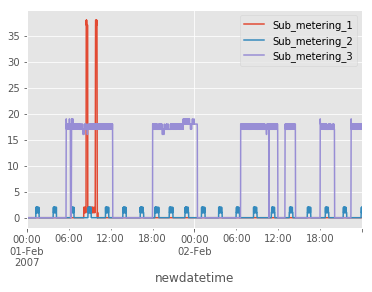

In [36]:
df2.plot(x='newdatetime',y=['Sub_metering_1','Sub_metering_2','Sub_metering_3'])
plt.savefig('plot3.png')
plt.show()

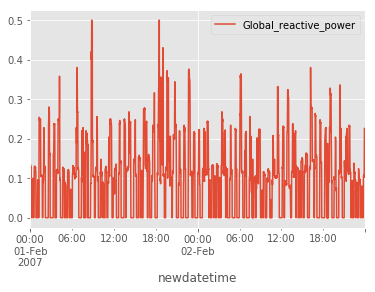

In [37]:
df2.plot(x='newdatetime',y='Global_reactive_power')
plt.savefig('plot4.png')
plt.show()

## Using Matplotlib

(array([  1.35000000e+03,   9.90000000e+01,   7.06000000e+02,
          2.20000000e+02,   1.58000000e+02,   1.81000000e+02,
          7.80000000e+01,   4.40000000e+01,   1.90000000e+01,
          1.70000000e+01,   4.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00]),
 array([ 0.22      ,  0.70413333,  1.18826667,  1.6724    ,  2.15653333,
         2.64066667,  3.1248    ,  3.60893333,  4.09306667,  4.5772    ,
         5.06133333,  5.54546667,  6.0296    ,  6.51373333,  6.99786667,
         7.482     ]),
 <a list of 15 Patch objects>)

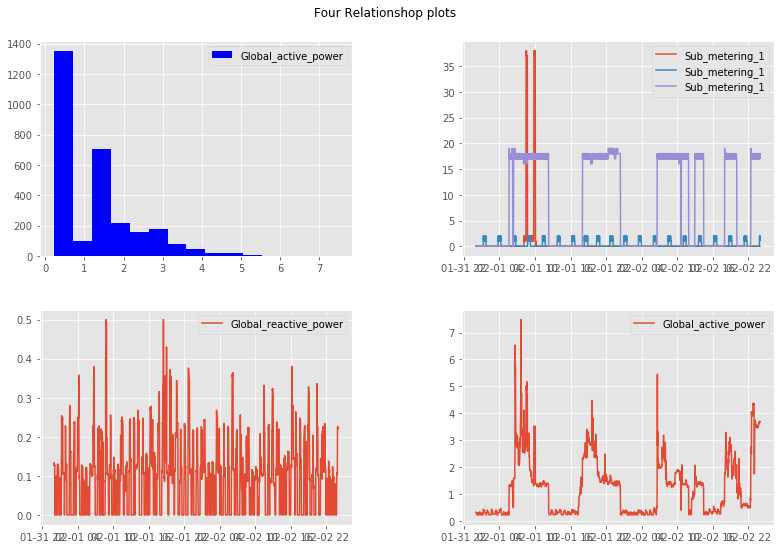

In [38]:
x= df2['newdatetime']
y1 = df2['Sub_metering_1']
y2 = df2['Sub_metering_2']
y3 = df2['Sub_metering_3']
y4 = df2['Global_reactive_power']
y5 = df2['Global_active_power']
plt.figure(figsize=(50, 50))
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,8))

ax1.hist(df2['Global_active_power'],bins=15, color='blue')
ax1.legend()

ax2.plot(x, y1, x, y2, x,y3)
ax2.legend()

ax3.plot(x, y4)
ax3.legend()

ax4.plot(x, y5)
ax4.legend()
plt.subplots_adjust(top=0.92, bottom=0.08,left=0.1, right=0.95,hspace=0.25, wspace=0.35)
fig.suptitle('Four Relationshop plots')

plt.show()

### Using matplotlib's ggplots

In [24]:
import matplotlib
#matplotlib.style.use('ggplot') 

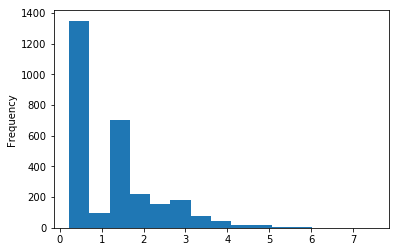

In [25]:
df2['Global_active_power'].plot.hist(bins=15)
plt.show()

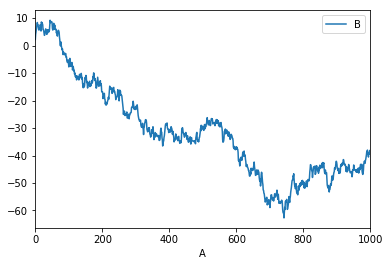

In [26]:
np.random.seed(123456789)
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))

df3.plot(x='A',y='B')
plt.show()

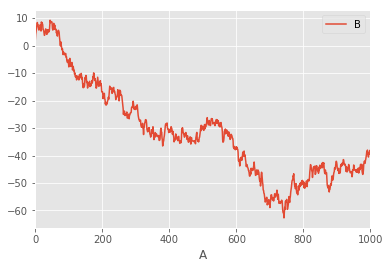

In [27]:
matplotlib.style.use('ggplot') 
np.random.seed(123456789)
df4 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df4['A'] = pd.Series(list(range(len(df))))

df4.plot(x='A',y='B')
plt.show()